In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from glob import glob

In [2]:
test = [1,2,3]
test[:-1]

[1, 2]

In [3]:
train_file = []
test_file = []
for i in range(10):
    for file in sorted(glob("../Data/rotationver/"+str(i) + "/*" )):
        train_file.append(file)
    test_file = test_file + train_file[-62:-31]
    train_file = train_file[:-62] + train_file[-31:]
    

In [4]:
test_file

['../Data/rotationver/0\\0_4_rotation_1.png',
 '../Data/rotationver/0\\0_4_rotation_10.png',
 '../Data/rotationver/0\\0_4_rotation_11.png',
 '../Data/rotationver/0\\0_4_rotation_12.png',
 '../Data/rotationver/0\\0_4_rotation_13.png',
 '../Data/rotationver/0\\0_4_rotation_14.png',
 '../Data/rotationver/0\\0_4_rotation_15.png',
 '../Data/rotationver/0\\0_4_rotation_16.png',
 '../Data/rotationver/0\\0_4_rotation_17.png',
 '../Data/rotationver/0\\0_4_rotation_18.png',
 '../Data/rotationver/0\\0_4_rotation_19.png',
 '../Data/rotationver/0\\0_4_rotation_2.png',
 '../Data/rotationver/0\\0_4_rotation_20.png',
 '../Data/rotationver/0\\0_4_rotation_21.png',
 '../Data/rotationver/0\\0_4_rotation_22.png',
 '../Data/rotationver/0\\0_4_rotation_23.png',
 '../Data/rotationver/0\\0_4_rotation_24.png',
 '../Data/rotationver/0\\0_4_rotation_25.png',
 '../Data/rotationver/0\\0_4_rotation_26.png',
 '../Data/rotationver/0\\0_4_rotation_27.png',
 '../Data/rotationver/0\\0_4_rotation_28.png',
 '../Data/rotat

In [5]:
len(test_file)

310

In [6]:
train_data = np.zeros((len(train_file), 400,400))
count = 0

for file in sorted(train_file):
    # train_data[count,:,:] = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    train_data[count,:,:] = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    count+=1
    
test_data = np.zeros((len(test_file), 400,400))
count = 0

for file in sorted(test_file):
    test_data[count,:,:] = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    count+=1


In [7]:
train_data.shape

(1550, 400, 400)

In [8]:
for i in range(1550):
    temp_mean = train_data[i,train_data[i,:,:] > 0].mean()
    train_data[i,train_data[i,:,:] > 0] = (train_data[i,train_data[i,:,:] > 0]/ temp_mean) * 150 / 255.0
for i in range(310):
    temp_mean = test_data[i,test_data[i,:,:] > 0].mean()
    test_data[i] = (test_data[i]  / temp_mean) * 150 / 255.0

In [9]:
train_data[i,train_data[i,:,:] > 0].shape

(35427,)

In [10]:
test_data[i,test_data[i,:,:] > 0].shape

(32163,)

In [11]:
train_data[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
print(train_data[train_data > 0].mean())
print(train_data[40,train_data[40,:,:] >0].mean())


0.5882352941176477
0.588235294117647


In [13]:
print(test_data[test_data > 0].mean())
print(test_data[40,test_data[40,:,:] >= 100].mean())

0.5882352941176476
nan


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27216\2959208502.py:2: RuntimeWarning: Mean of empty slice.
  print(test_data[40,test_data[40,:,:] >= 100].mean())
c:\Users\rlaxo\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
train_target = np.zeros(155).astype(int)

for i in range(1,10):
    train_target = np.concatenate([train_target,np.full(155,i)])
    
test_target = np.zeros(31).astype(int)
for i in range(1,10):
    test_target = np.concatenate([test_target,np.full(31,i)])

In [15]:
train_data = train_data.reshape(1550,400,400,-1)
test_data = test_data.reshape(310,400,400,-1)

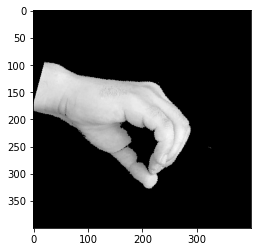

In [16]:
plt.imshow(train_data[0],cmap='gray')

In [17]:
(train_data[0,:,:] >= 50 )

array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]]])

In [18]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

print(train_data.dtype)

float32


In [19]:
import tensorflow as tf
from tensorflow import keras
import keras.metrics
model = keras.Sequential()
model.add(
    keras.layers.Conv2D(
        32,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (400,400,1)
    )
)
model.add(
    keras.layers.MaxPool2D(2)
)
model.add(
    keras.layers.Conv2D(
        64,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same'
    )
)
model.add(
    keras.layers.MaxPool2D(2)
)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))




In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 400, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 200, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 640000)            0         
                                                                 
 dense (Dense)               (None, 128)               8

In [21]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best_cnn_model_ASL.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) 

history = model.fit(
    train_data, 
    train_target, 
    batch_size = 16,
    epochs = 100,
    validation_data = (test_data, test_target),  
    callbacks = [checkpoint_cb, early_stopping_cb]
)


Epoch 1/100
97/97 [==============================] - 9s 69ms/step - loss: 0.8935 - accuracy: 0.7181 - val_loss: 0.3174 - val_accuracy: 0.9032
Epoch 2/100
97/97 [==============================] - 6s 60ms/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.1819 - val_accuracy: 0.9161
Epoch 3/100
97/97 [==============================] - 6s 59ms/step - loss: 1.4721e-04 - accuracy: 1.0000 - val_loss: 0.1554 - val_accuracy: 0.9355
Epoch 4/100
97/97 [==============================] - 6s 60ms/step - loss: 3.8335e-05 - accuracy: 1.0000 - val_loss: 0.1478 - val_accuracy: 0.9419
Epoch 5/100
97/97 [==============================] - 6s 60ms/step - loss: 2.0507e-05 - accuracy: 1.0000 - val_loss: 0.1402 - val_accuracy: 0.9452
Epoch 6/100
97/97 [==============================] - 6s 60ms/step - loss: 1.3130e-05 - accuracy: 1.0000 - val_loss: 0.1356 - val_accuracy: 0.9452
Epoch 7/100
97/97 [==============================] - 6s 60ms/step - loss: 9.1745e-06 - accuracy: 1.0000 - val_loss: 0.1284 - val_acc

In [22]:
from PIL import Image
import cv2

In [23]:
X_test = np.zeros((10,400,400))
for i in range(10):
    test_img = cv2.imread("../Data/youngjin/%d_7.png"%i,cv2.IMREAD_GRAYSCALE)
    test_img = cv2.resize(test_img, (400,400))
    res , th1 = cv2.threshold(test_img,100,255,cv2.THRESH_TOZERO)
    
    
    X_test[i,:,:] = th1
    
    temp_mean = th1[th1>0].mean()
    X_test[i] = (X_test[i]/temp_mean) * 150 / 255.0
    

In [24]:
import matplotlib.pyplot as plt

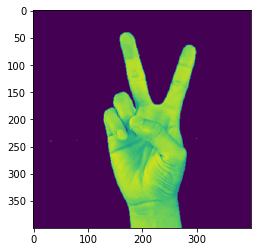

In [25]:
plt.imshow(X_test[2])

In [26]:
y_test = np.arange(10)
X_test = X_test.reshape(10,400,400,1)

In [27]:
pred = model.predict(X_test)

In [28]:
for i in range(10):
    print(pred[i].argmax() == y_test[i]) 

True
False
True
True
False
True
True
True
True
False
